In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
#x = np.logspace(10, 14, 1001)
x = np.linspace(0, 1e+14, 10001)
pdf_x = np.exp(-(x/1e13)**2/2) # PDF of N (not normalized), 1 sigma limit of 1e13
pdf_x_interp = interp1d(x=x, y=pdf_x, fill_value='extrapolate')

# CDF of logN
cdf_x = np.cumsum(pdf_x)/np.sum(pdf_x)
#cdf_x_interp = interp1d(x=x, y=cdf_x)
#cdf_x_inv_interp = interp1d(x=cdf_x, y=x)

In [3]:
#np.log10(cdf_x_inv_interp(.84))

Text(0, 0.5, 'CDF(X)')

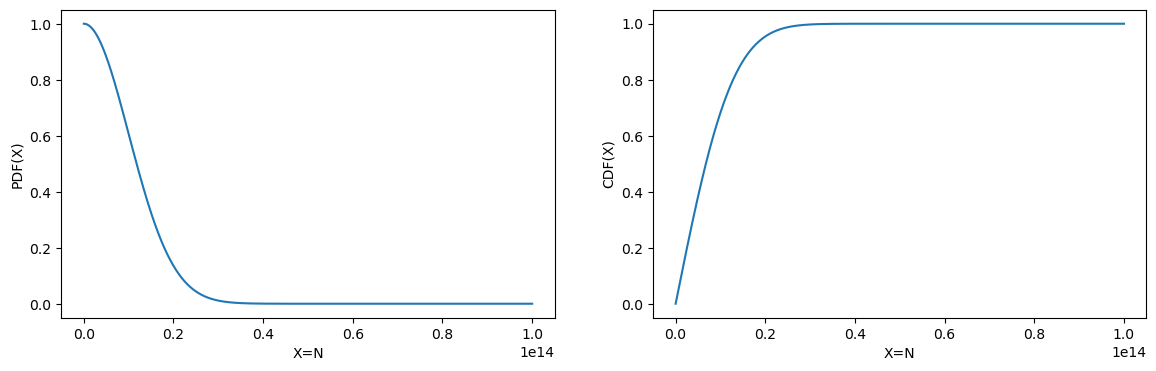

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14,4), sharex=True)

axes[0].plot(x, pdf_x)
axes[0].set_xlabel('X=N')
axes[0].set_ylabel('PDF(X)')

axes[1].plot(x, cdf_x)
#axes[1].axvline(cdf_x_inv_interp(.975), lw=.8, linestyle=':', color='black')
#axes[1].axhline(.975, lw=.8, linestyle=':', color='black')
axes[1].set_xlabel('X=N')
axes[1].set_ylabel('CDF(X)')

#axes[1].set_xlim(0,3e+13)
#axes[1].set_ylim(0,1)
#axes[1].set_xscale('log')

In [6]:
y = np.log10(x)
pdf_y = pdf_x_interp(10**y)*10**y

# CDF of logN
cdf_y = np.cumsum(pdf_y)/np.sum(pdf_y)
#cdf_y_inv_interp = interp1d(x=cdf_y, y=y)

/var/folders/tj/vc_wjrpj36sf3zws4s7s770c0000gn/T/ipykernel_32802/816272212.py:1: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(x)


In [7]:
#cdf_y = cdf_x_interp(10**y)
#pdf_y = (cdf_y[1:]-cdf_y[:-1])/(y[1:]-y[:-1])

In [9]:
#cdf_y_inv_interp(.84)

Text(0, 0.5, 'CDF(Y)')

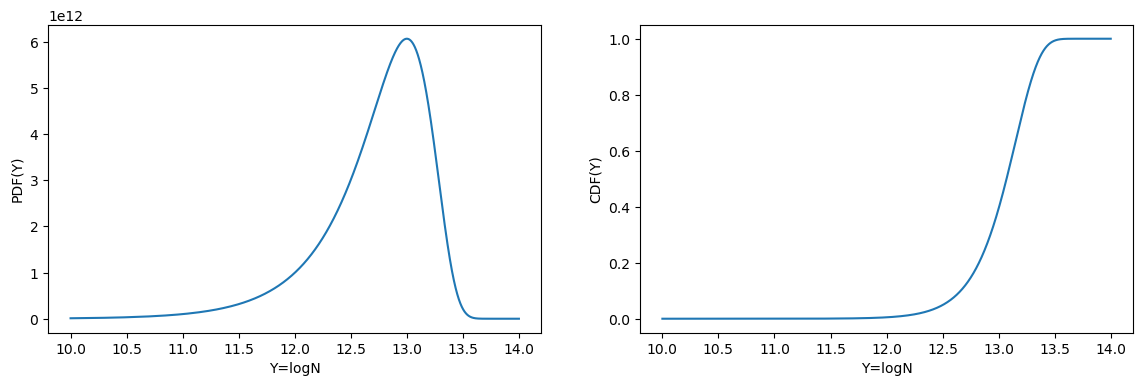

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14,4), sharex=True)

#axes[0].plot(.5*(y[1:]+y[:-1]), pdf_y)
axes[0].plot(y, pdf_y)
axes[0].set_xlabel('Y=logN')
axes[0].set_ylabel('PDF(Y)')

axes[1].plot(y, cdf_y)
#axes[1].axvline(cdf_y_inv_interp(.975), lw=.8, linestyle=':', color='black')
#axes[1].axhline(.975, lw=.8, linestyle=':', color='black')
axes[1].set_xlabel('Y=logN')
axes[1].set_ylabel('CDF(Y)')

In [5]:
a = np.random.random(100000)
random_x = interp1d(cdf, np.log10(x), bounds_error=False, fill_value='extrapolate')(a)

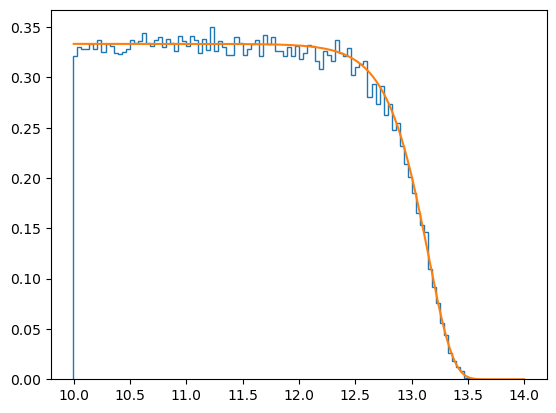

In [11]:
# comparison of the input logN PDF and random logN
_ = plt.hist(random_x, bins=100, histtype='step', density=1)
plt.plot(np.log10(x), p/3) # 3.0 is by eye to normalize the logN PDF.
#plt.plot(np.log10(x), x*p/9e+12) # 3.0 is by eye to normalize the logN PDF.

(0.0, 1.0)

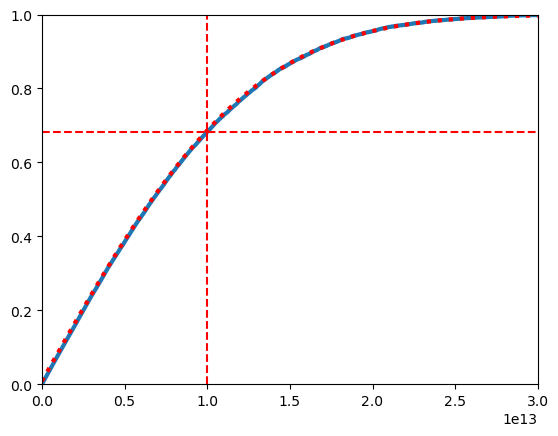

In [12]:
# reconstruct the CDF of N
sorted_x = random_x[np.argsort(random_x)]
plt.plot(10**sorted_x, np.cumsum(10**sorted_x)/np.sum(10**sorted_x), lw=3)
# directly calculated CDF of N
x = np.linspace(0, 1e14, 1001)
p = np.exp(-(x/1e13)**2/2)
plt.plot(x, np.cumsum(p)/np.sum(p), ':', color='r', lw=3)
plt.xlim(0, 3e13)
plt.hlines(norm.cdf(1)*2-1, 0, 1e14, ls='--', color='r')
plt.vlines(1e13, 0, 1, ls='--', color='r')
plt.ylim(0, 1)